In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived', axis=1), train_data['Survived'], test_size=0.25)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
58,59,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.75,NaN,S
506,507,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.00,NaN,S
818,819,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S
426,427,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.00,NaN,S
464,465,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.05,NaN,S


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 58 to 435
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Name         668 non-null    object 
 3   Sex          668 non-null    object 
 4   Age          533 non-null    float64
 5   SibSp        668 non-null    int64  
 6   Parch        668 non-null    int64  
 7   Ticket       668 non-null    object 
 8   Fare         668 non-null    float64
 9   Cabin        157 non-null    object 
 10  Embarked     666 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


In [8]:
object_cols = X_train.select_dtypes('object').columns
object_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

<AxesSubplot: >

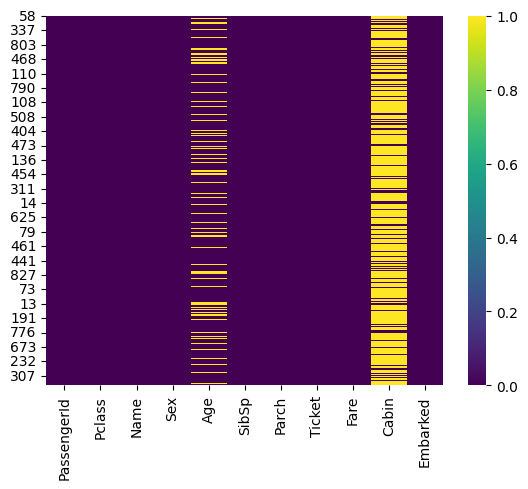

In [9]:
sns.heatmap(X_train.isnull(), cmap='viridis')

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

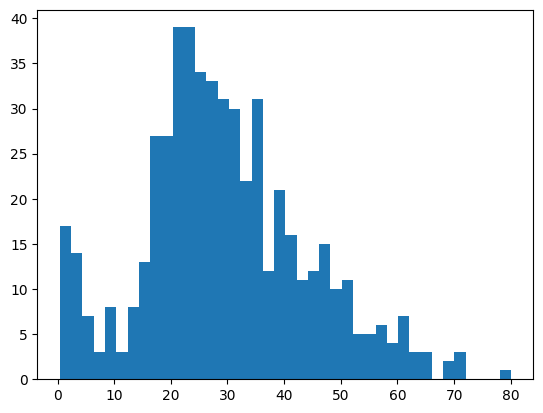

In [11]:
plt.hist('Age', data=X_train, bins=40)
plt.show()

In [12]:
X_train.nunique()

PassengerId    668
Pclass           3
Name           668
Sex              2
Age             83
SibSp            7
Parch            7
Ticket         543
Fare           215
Cabin          123
Embarked         3
dtype: int64

<AxesSubplot: xlabel='Embarked', ylabel='Age'>

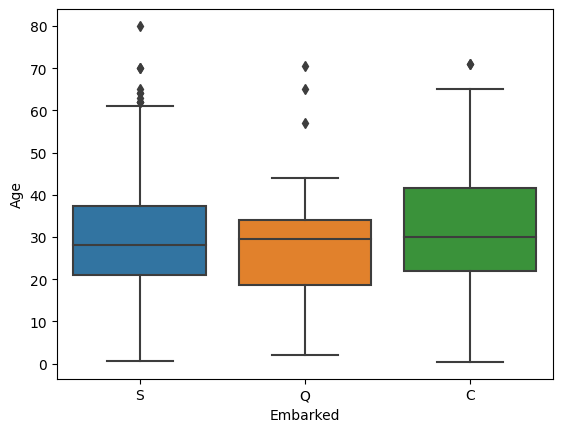

In [13]:
sns.boxplot(data=X_train, y='Age', x='Embarked')

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

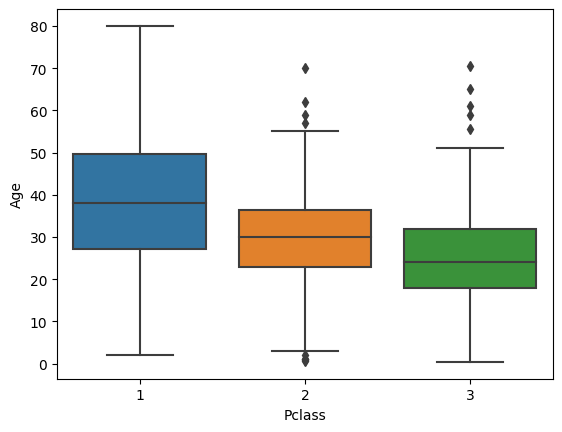

In [14]:
sns.boxplot(data=X_train, y='Age', x='Pclass')

In [15]:
X_train['Embarked'].dropna().mode()

0    S
Name: Embarked, dtype: object

In [16]:
class AgeImputer(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        mean_ages = X.groupby('Pclass')['Age'].mean()
        X['Age'] = X['Age'].fillna(X['Pclass'].map(mean_ages))
        return X

In [17]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X['Embarked'].fillna('S', inplace=True)
        OH_cols = pd.DataFrame(encoder.fit_transform(X[['Embarked']]), columns=encoder.get_feature_names_out())
        OH_cols.index = X.index
        X = pd.concat([X, OH_cols], axis=1)
        X.drop('Embarked', axis=1, inplace=True)
        
        OH_cols = pd.DataFrame(encoder.fit_transform(X[['Sex']]), columns=encoder.get_feature_names_out())
        OH_cols.index = X.index
        X = pd.concat([X, OH_cols], axis=1)
        X.drop('Sex', axis=1, inplace=True)
        return X

In [18]:
class ColumnDropper(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['Cabin', 'Name', 'Ticket'], axis=1)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
pipeline = Pipeline(steps = [
    ('coldrop', ColumnDropper()),
    ('imputer', AgeImputer()),
    ('encoder', FeatureEncoder())
])

In [21]:
test_train = X_train.copy()
test_test = X_test.copy()

# enc = FeatureEncoder()
# enc.fit_transform(test_train)
# enc.transform(test_test)

# test_train.info()
# test_test['Embarked'].isna().sum()
pipeline.fit_transform(test_train, y_train)
pipeline.transform(test_test)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
606,607,3,30.000000,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
597,598,3,49.000000,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
175,176,3,18.000000,1,1,7.8542,0.0,0.0,1.0,0.0,1.0
616,617,3,34.000000,1,1,14.4000,0.0,0.0,1.0,0.0,1.0
640,641,3,20.000000,0,0,7.8542,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
331,332,1,45.500000,0,0,28.5000,0.0,0.0,1.0,0.0,1.0
403,404,3,28.000000,1,0,15.8500,0.0,0.0,1.0,0.0,1.0
164,165,3,1.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0
359,360,3,25.987113,0,0,7.8792,0.0,1.0,0.0,1.0,0.0


In [22]:
X_train_new = pipeline.fit_transform(X_train, y_train)
X_test_new = pipeline.transform(X_test)


print(X_train_new.head())
X_test_new.head()

     PassengerId  Pclass        Age  SibSp  Parch   Fare  Embarked_C  \
58            59       2   5.000000      1      2  27.75         0.0   
506          507       2  33.000000      0      2  26.00         0.0   
818          819       3  43.000000      0      0   6.45         0.0   
426          427       2  28.000000      1      0  26.00         0.0   
464          465       3  24.822364      0      0   8.05         0.0   

     Embarked_Q  Embarked_S  Sex_female  Sex_male  
58          0.0         1.0         1.0       0.0  
506         0.0         1.0         1.0       0.0  
818         0.0         1.0         0.0       1.0  
426         0.0         1.0         1.0       0.0  
464         0.0         1.0         0.0       1.0  


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
606,607,3,30.0,0,0,7.8958,0.0,0.0,1.0,0.0,1.0
597,598,3,49.0,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
175,176,3,18.0,1,1,7.8542,0.0,0.0,1.0,0.0,1.0
616,617,3,34.0,1,1,14.4000,0.0,0.0,1.0,0.0,1.0
640,641,3,20.0,0,0,7.8542,0.0,0.0,1.0,0.0,1.0


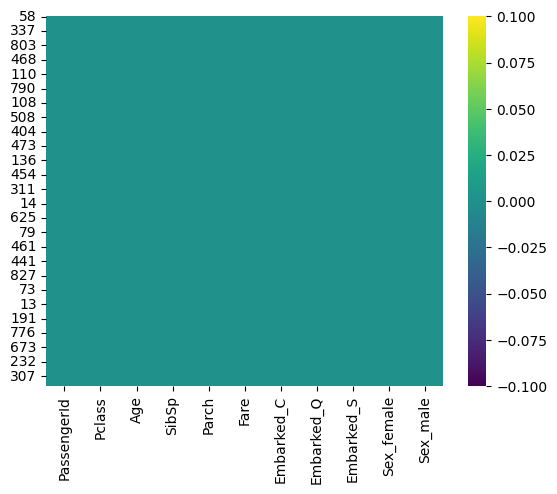

In [23]:
sns.heatmap(X_train_new.isnull(), cmap='viridis')
plt.show()

In [24]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 58 to 435
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  668 non-null    int64  
 1   Pclass       668 non-null    int64  
 2   Age          668 non-null    float64
 3   SibSp        668 non-null    int64  
 4   Parch        668 non-null    int64  
 5   Fare         668 non-null    float64
 6   Embarked_C   668 non-null    float64
 7   Embarked_Q   668 non-null    float64
 8   Embarked_S   668 non-null    float64
 9   Sex_female   668 non-null    float64
 10  Sex_male     668 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 62.6 KB


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [26]:
rfc = RandomForestClassifier()

param_grid = {
    'n_estimators' : [50, 100, 200, 500, 600],
    'max_depth' : [5, 10, 20],
    'min_samples_split' : [2, 5, 10, 15]
}

gridcv = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=3)

In [27]:
gridcv.fit(X_train_new, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.799 total time=   0.1s
[CV 2/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.1s
[CV 3/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.806 total time=   0.1s
[CV 4/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.812 total time=   0.1s
[CV 5/5] END max_depth=5, min_samples_split=2, n_estimators=50;, score=0.835 total time=   0.1s
[CV 1/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.4s
[CV 2/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.836 total time=   0.3s
[CV 3/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.3s
[CV 4/5] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.827 total time=   0.3s
[CV 5/5] END max_depth=5, min_samples_split=2, n_estimators=100;, scor

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 100, 200, 500, 600]},
             verbose=3)

In [28]:
gridcv.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)

In [29]:
gridcv_pred = gridcv.predict(X_test_new)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, gridcv_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       136
           1       0.86      0.62      0.72        87

    accuracy                           0.81       223
   macro avg       0.83      0.78      0.79       223
weighted avg       0.82      0.81      0.80       223



In [31]:
new_train_data = train_data.copy()

new_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
new_y_train = new_train_data['Survived']
new_y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
new_train_data.drop('Survived', axis=1, inplace=True)

In [34]:
new_train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
new_train_data = pipeline.fit_transform(new_train_data, new_y_train)

In [36]:
param_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [None, 5, 10],
    'min_samples_split' : [2, 3, 4]
}

gridcv = GridSearchCV(estimator=rfc, param_grid=param_grid, verbose=3, scoring='accuracy')

gridcv.fit(new_train_data, new_y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.777 total time=   0.2s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.809 total time=   0.2s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.854 total time=   0.2s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.820 total time=   0.2s
[CV 5/5] END max_depth=None, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.2s
[CV 1/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.749 total time=   0.3s
[CV 2/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.798 total time=   0.3s
[CV 3/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.848 total time=   0.3s
[CV 4/5] END max_depth=None, min_samples_split=2, n_estimators=100;, score=0.803 total time=   0.3s
[CV 5/5] END max_depth=None, min_samples_sp

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy', verbose=3)

In [37]:
print(gridcv.best_estimator_)

RandomForestClassifier(max_depth=5, n_estimators=50)


In [38]:
grid_pred = gridcv.predict(X_test_new)

In [39]:
print(classification_report(y_test, grid_pred))
print(gridcv.score(X_test_new, y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       136
           1       0.92      0.67      0.77        87

    accuracy                           0.85       223
   macro avg       0.87      0.81      0.83       223
weighted avg       0.86      0.85      0.84       223

0.8475336322869955


In [40]:
final_test_data = pipeline.fit_transform(test_data)

In [41]:
X_final_test = final_test_data.fillna(method='ffill')

In [42]:
predictions = gridcv.predict(X_final_test)

In [43]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
